## Project Group #5 - Milestone 3
##### Member : Kaylee Vo , Chloe Soe, Sirisom Pranivong, Kai Yeh

## Data Description
This "Telecom Churn dataset" was taken from Kaggle which originally is part of the data used in a survey paper titled "A Survey on Customer Churn Prediction in Telecom Industry: Datasets, Methods and Metrics" by V. Umayaparvathi and K. Iyakutti. Information from this paper is used to create a data dictionary.

Key customer attributes influencing churn are grouped into categories: 
**customer demography,  usage pattern,  value added service,  customer care service,  Bill & Payment and credit score.**

Source :https://www.kaggle.com/datasets/jpacse/datasets-for-churn-telecom/data

Support survey paper :https://www.irjet.net/archives/V3/i4/IRJET-V3I4213.pdf

- We acquired a dataset with 71,047 observations and 58 features.
- The target label is a binary churn flag: "Yes" for churned and "No" for not churned.
- The dataset is pre-split into train and test sets, with the test set containing 20,000 observations (28% split).
- Features include: 35 quantitative (26 continuous, 9 discrete) and 23 categorical.
- Feature category consists of customer demography (28-highest), Customer usage(11), Value add (6), Customer care (6), Billpayment (3) and Credit score (2)


### Data Missingness/Imbalance/Scaling
- Missing data affects 14 features and 1,295 rows, with some features showing perfectly correlated missingness (e.g., MonthlyMinutes and MonthlyRevenue).
- For quantitative variables, Random Regression imputation is used, adding Gaussian noise to OLS-predicted values to allow sensitivity analysis and a range of imputed values.
- The binary target variable (Churn), initially imbalanced at a 0.40 ratio of No’s to Yes’s, was balanced to 1:1 using random oversampling, which duplicates random observations from the minority class.
- We selected standardization as our scaling approach over normalization (min-max scaling) to maintain compatibility with methods like Lasso and PCA, which require consistent scaling. Although we considered using min-max scaling for features with large ranges or outliers and standardizing others, this mixed approach was deemed too risky, as it could compromise interpretability and hinder the effectiveness of analyses that rely on uniform feature scales.


## Data Summary

Note : Data Cleaning ,scaling, missingness and balance the data are part of MS2 notebook

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from math import log, sqrt
import seaborn as sns
from math import log, sqrt, sin
import matplotlib.pyplot as plt
from sklearn.preprocessing import PowerTransformer

In [9]:

train = pd.read_csv('./data/train_clean.csv')
test = pd.read_csv('./data/test_clean.csv')

pd.set_option('display.max_columns', None)  #Make it display all columns
train.head()

,CustomerID,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,RetentionCalls,RetentionOffersAccepted,ReferralsMadeBySubscriber,IncomeGroup,AdjustmentsToCreditRating,Churn,ServiceArea,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,NewCellphoneUser,NotNewCellphoneUser,OwnsMotorcycle,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,0.7,0.7,6.3,0.0,0.0,97.2,0.0,0.0,58.0,24.0,1.3,0.0,0.3,61,2,1,2.0,2.0,361.0,62.0,0.0,1,0,0,4,0,Yes,SEAPOR503,No,No,Yes,No,No,Known,Yes,Yes,No,No,Yes,Yes,No,No,No,30,Yes,1-Highest,Suburban,Professional,No
1,3000010,16.99,10.0,17.0,0.00,0.0,0.0,0.0,0.0,0.3,0.0,2.7,0.0,0.0,0.0,0.0,0.0,5.0,1.0,0.3,0.0,0.0,58,1,1,2.0,1.0,1504.0,40.0,42.0,0,0,0,5,0,Yes,PITHOM412,Yes,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,Yes,No,No,30,No,4-Medium,Suburban,Professional,Yes
2,3000014,38.00,8.0,38.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.3,0.0,1.3,3.7,0.0,0.0,0.0,60,1,1,1.0,1.0,1812.0,26.0,26.0,0,0,0,6,0,No,MILMIL414,Yes,No,No,No,No,Unknown,No,No,No,No,No,Yes,Yes,No,No,Unknown,No,3-Good,Town,Crafts,Yes
3,3000022,82.28,1312.0,75.0,1.24,0.0,0.0,0.0,0.0,52.0,7.7,76.0,4.3,1.3,200.3,370.3,147.0,555.7,303.7,59.7,0.0,22.7,59,2,2,9.0,4.0,458.0,30.0,0.0,0,0,0,6,0,No,PITHOM412,No,No,Yes,No,No,Known,Yes,Yes,No,No,No,Yes,Yes,No,No,10,No,4-Medium,Other,Other,No
4,3000026,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53,2,2,4.0,3.0,852.0,46.0,54.0,0,0,0,9,1,Yes,OKCTUL918,No,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,No,Yes,No,10,No,1-Highest,Other,Professional,Yes


In [22]:
#Data size
print("Train data shape:", train.shape)
print(f"Test data shape:", test.shape)
print (f"Train data Percentage: {round(train.shape[0]/(train.shape[0] + test.shape[0]), 4)}")

Train data shape: (51047, 58)
Test data shape: (20000, 58)
Train data Percentage: 0.7185


In [29]:
#Descriptive Statistics
train.describe().round(2)

,CustomerID,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,RetentionCalls,RetentionOffersAccepted,ReferralsMadeBySubscriber,IncomeGroup,AdjustmentsToCreditRating
count,51047.00,51047.00,51047.00,51047.00,51047.00,51047.00,51047.00,51047.00,51047.00,51047.00,51047.00,51047.00,51047.00,51047.00,51047.00,51047.00,51047.00,51047.00,51047.00,51047.00,51047.00,51047.00,51047.00,51047.00,51047.00,51047.00,51047.00,51047.00,51047.00,51047.00,51047.00,51047.00,51047.00,51047.00,51047.00
mean,3201956.88,58.67,524.65,46.74,0.89,39.87,1.22,-9.06,-0.89,6.01,4.09,28.29,1.87,0.30,114.80,25.38,8.18,90.55,67.65,10.16,0.01,1.84,18.76,1.53,1.35,1.81,1.56,380.54,30.94,20.85,0.04,0.02,0.05,4.32,0.05
std,116905.56,44.60,530.74,23.96,2.23,96.71,9.84,232.09,36.50,9.04,10.95,38.88,5.10,1.17,166.49,35.21,16.67,104.95,92.75,15.56,0.59,5.59,9.80,1.22,0.68,1.33,0.91,253.80,22.29,24.11,0.21,0.14,0.31,3.14,0.38
min,3000002.00,-119.35,-1251.00,-80.85,-6.62,-302.05,-52.99,-3875.00,-1107.70,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,6.00,1.00,0.00,0.57,1.00,-5.00,-62.07,-90.58,0.00,0.00,0.00,0.00,0.00
25%,3100632.00,33.52,158.00,30.00,0.00,0.00,0.00,-56.00,-3.90,0.70,0.00,5.30,0.00,0.00,8.30,3.30,0.00,23.00,11.00,1.70,0.00,0.00,11.00,1.00,1.00,1.00,1.00,205.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,3201534.00,48.35,366.00,45.00,0.25,3.00,0.00,0.00,0.00,3.00,1.00,16.30,0.00,0.00,52.80,13.70,2.00,62.00,35.70,5.30,0.00,0.30,16.00,1.00,1.00,1.00,1.00,329.00,36.00,0.00,0.00,0.00,0.00,5.00,0.00
75%,3305376.00,70.97,723.00,60.00,0.99,41.00,0.30,39.00,0.40,7.70,3.70,36.30,1.70,0.30,153.50,34.00,9.30,121.30,88.70,12.30,0.00,1.30,24.00,2.00,2.00,2.00,2.00,515.00,48.00,42.00,0.00,0.00,0.00,7.00,0.00
max,3399994.00,1223.38,7359.00,400.00,159.39,4321.00,1112.40,5192.00,2483.50,221.70,384.30,848.70,327.30,66.00,2692.40,644.30,519.30,2090.70,1474.70,411.70,81.30,212.70,61.00,196.00,53.00,24.00,15.00,1812.00,99.00,99.00,4.00,3.00,35.00,9.00,25.00


In [15]:
#Data Types and missingness
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51047 entries, 0 to 51046
Data columns (total 58 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CustomerID                 51047 non-null  int64  
 1   MonthlyRevenue             51047 non-null  float64
 2   MonthlyMinutes             51047 non-null  float64
 3   TotalRecurringCharge       51047 non-null  float64
 4   DirectorAssistedCalls      51047 non-null  float64
 5   OverageMinutes             51047 non-null  float64
 6   RoamingCalls               51047 non-null  float64
 7   PercChangeMinutes          51047 non-null  float64
 8   PercChangeRevenues         51047 non-null  float64
 9   DroppedCalls               51047 non-null  float64
 10  BlockedCalls               51047 non-null  float64
 11  UnansweredCalls            51047 non-null  float64
 12  CustomerCareCalls          51047 non-null  float64
 13  ThreewayCalls              51047 non-null  flo

In [17]:
#No. Of missing vablues per variable
train.isnull().sum()

CustomerID                    0
MonthlyRevenue                0
MonthlyMinutes                0
TotalRecurringCharge          0
DirectorAssistedCalls         0
OverageMinutes                0
RoamingCalls                  0
PercChangeMinutes             0
PercChangeRevenues            0
DroppedCalls                  0
BlockedCalls                  0
UnansweredCalls               0
CustomerCareCalls             0
ThreewayCalls                 0
ReceivedCalls                 0
OutboundCalls                 0
InboundCalls                  0
PeakCallsInOut                0
OffPeakCallsInOut             0
DroppedBlockedCalls           0
CallForwardingCalls           0
CallWaitingCalls              0
MonthsInService               0
UniqueSubs                    0
ActiveSubs                    0
Handsets                      0
HandsetModels                 0
CurrentEquipmentDays          0
AgeHH1                        0
AgeHH2                        0
RetentionCalls                0
Retentio

In [25]:
# Separate quantitative and categorical variables
quantitative_columns = train.select_dtypes(include=['float64']).columns
quantitative_discrete_columns = train.select_dtypes(include=['int64']).columns
categorical_columns = train.select_dtypes(include=['object']).columns

print("\nQuantitative Variables:", list(quantitative_columns))
print("Total Quantitative-Continuous Variables:", len(quantitative_columns))

print("\nQuantitative Discrete Variables:", list(quantitative_discrete_columns))
print("Total Quantitative-Discrete Variables:", len(quantitative_discrete_columns))

print("\nCategorical Variables:", list(categorical_columns))
print("Total Categorical Variables:", len(categorical_columns))


Quantitative Variables: ['MonthlyRevenue', 'MonthlyMinutes', 'TotalRecurringCharge', 'DirectorAssistedCalls', 'OverageMinutes', 'RoamingCalls', 'PercChangeMinutes', 'PercChangeRevenues', 'DroppedCalls', 'BlockedCalls', 'UnansweredCalls', 'CustomerCareCalls', 'ThreewayCalls', 'ReceivedCalls', 'OutboundCalls', 'InboundCalls', 'PeakCallsInOut', 'OffPeakCallsInOut', 'DroppedBlockedCalls', 'CallForwardingCalls', 'CallWaitingCalls', 'Handsets', 'HandsetModels', 'CurrentEquipmentDays', 'AgeHH1', 'AgeHH2']
Total Quantitative-Continuous Variables: 26

Quantitative Discrete Variables: ['CustomerID', 'MonthsInService', 'UniqueSubs', 'ActiveSubs', 'RetentionCalls', 'RetentionOffersAccepted', 'ReferralsMadeBySubscriber', 'IncomeGroup', 'AdjustmentsToCreditRating']
Total Quantitative-Discrete Variables: 9

Categorical Variables: ['Churn', 'ServiceArea', 'ChildrenInHH', 'HandsetRefurbished', 'HandsetWebCapable', 'TruckOwner', 'RVOwner', 'Homeownership', 'BuysViaMailOrder', 'RespondsToMailOffers', 'O

In [ ]:
#Separate variables per category

#Adding Churn but not counting it for the further steps analysis

BillPayment = ["Churn","MonthlyRevenue","TotalRecurringCharge","PercChangeRevenues"]
Customercare = ["Churn","BlockedCalls","CustomerCareCalls","DroppedBlockedCalls","RespondsToMailOffers","OptOutMailings","MadeCallToRetentionTeam"]
Creditscore = ["Churn","AdjustmentsToCreditRating","CreditRating"]
Customer_demo = ["Churn","MonthsInService","UniqueSubs","ActiveSubs","ServiceArea","Handsets","HandsetModels","CurrentEquipmentDays","AgeHH1","AgeHH2","ChildrenInHH","HandsetRefurbished","HandsetWebCapable","TruckOwner","RVOwner","Homeownership","BuysViaMailOrder","NonUSTravel","OwnsComputer","HasCreditCard","NewCellphoneUser","NotNewCellphoneUser","ReferralsMadeBySubscriber","IncomeGroup","OwnsMotorcycle","HandsetPrice","PrizmCode","Occupation","MaritalStatus"]
Customer_usage = ["Churn","MonthlyMinutes","OverageMinutes","RoamingCalls","PercChangeMinutes","DroppedCalls","UnansweredCalls","ReceivedCalls","OutboundCalls","InboundCalls","PeakCallsInOut","OffPeakCallsInOut"]
ValueAdd = ["Churn","DirectorAssistedCalls","ThreewayCalls","CallForwardingCalls","CallWaitingCalls","RetentionCalls","RetentionOffersAccepted"]

#We drop CustomerId in this case as the customer id is just a unique id per customer and not influence the churn

xtrain_pymt= train[BillPayment]
xtrain_care = train[Customercare]
xtrain_credit = train[Creditscore]
xtrain_customer_demo = train[Customer_demo]
xtrain_customer_usage = train[Customer_usage]
xtrain_valueadd = train[ValueAdd]

print("\n Bill Payment Category variables:", list(BillPayment))
print("\nTotal Bill PAyment features",len(BillPayment)-1)
print("\n Customer Care Category variables:", list(Customercare))
print("\nTotal Customer Care features",len(Customercare)-1)
print("\n Credit score variables:", list(Creditscore))
print("\nTotal Credit score features",len(Creditscore)-1)
print("\n Customer_demo Category variables:", list(Customer_demo))
print("\nTotal Customer_demo features",len(Customer_demo)-1)
print("\n Customer_usage Category variables:", list(Customer_usage))
print("\nTotal Customer_usage features",len(Customer_usage)-1)
print("\n Value Add Category variables:", list(ValueAdd))
print("\nTotal Value Add features",len(ValueAdd)-1)


 Bill Payment Category variables: ['Churn', 'MonthlyRevenue', 'TotalRecurringCharge', 'PercChangeRevenues']

Total Bill PAyment features 3

 Customer Care Category variables: ['Churn', 'BlockedCalls', 'CustomerCareCalls', 'DroppedBlockedCalls', 'RespondsToMailOffers', 'OptOutMailings', 'MadeCallToRetentionTeam']

Total Customer Care features 6

 Credit score variables: ['Churn', 'AdjustmentsToCreditRating', 'CreditRating']

Total Credit score features 2

 Customer_demo Category variables: ['Churn', 'MonthsInService', 'UniqueSubs', 'ActiveSubs', 'ServiceArea', 'Handsets', 'HandsetModels', 'CurrentEquipmentDays', 'AgeHH1', 'AgeHH2', 'ChildrenInHH', 'HandsetRefurbished', 'HandsetWebCapable', 'TruckOwner', 'RVOwner', 'Homeownership', 'BuysViaMailOrder', 'NonUSTravel', 'OwnsComputer', 'HasCreditCard', 'NewCellphoneUser', 'NotNewCellphoneUser', 'ReferralsMadeBySubscriber', 'IncomeGroup', 'OwnsMotorcycle', 'HandsetPrice', 'PrizmCode', 'Occupation', 'MaritalStatus']

Total Customer_demo featu

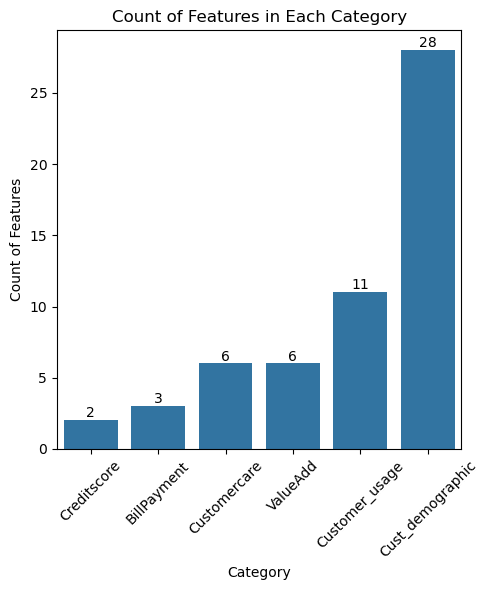

In [ ]:

# Data for each dataframe and their respective features
dataframes = {
    "BillPayment": ["MonthlyRevenue", "TotalRecurringCharge", "PercChangeRevenues"],
    "Customercare": ["BlockedCalls", "CustomerCareCalls", "DroppedBlockedCalls", "RespondsToMailOffers", "OptOutMailings", "MadeCallToRetentionTeam"],
    "Creditscore": ["AdjustmentsToCreditRating", "CreditRating"],
    "Cust_demographic": ["MonthsInService", "UniqueSubs", "ActiveSubs", "ServiceArea", "Handsets", "HandsetModels", "CurrentEquipmentDays", "AgeHH1", "AgeHH2", "ChildrenInHH", "HandsetRefurbished", "HandsetWebCapable", "TruckOwner", "RVOwner", "Homeownership", "BuysViaMailOrder", "NonUSTravel", "OwnsComputer", "HasCreditCard", "NewCellphoneUser", "NotNewCellphoneUser", "ReferralsMadeBySubscriber", "IncomeGroup", "OwnsMotorcycle", "HandsetPrice", "PrizmCode", "Occupation", "MaritalStatus"],
    "Customer_usage": ["MonthlyMinutes", "OverageMinutes", "RoamingCalls", "PercChangeMinutes", "DroppedCalls", "UnansweredCalls", "ReceivedCalls", "OutboundCalls", "InboundCalls", "PeakCallsInOut", "OffPeakCallsInOut"],
    "ValueAdd": ["DirectorAssistedCalls", "ThreewayCalls", "CallForwardingCalls", "CallWaitingCalls", "RetentionCalls", "RetentionOffersAccepted"]
}


df_names = list(dataframes.keys())
feature_counts = [len(features) for features in dataframes.values()]


train_data_wcategory = pd.DataFrame({
    'Category': df_names,
    'Feature Count': feature_counts
}).sort_values(by='Feature Count')


plt.figure(figsize=(5, 6))
ax = sns.barplot(data=train_data_wcategory, x='Category', y='Feature Count')
# plt.xlabel('Data Category')
plt.ylabel('Count of Features')
plt.title('Count of Features in Each Category')
plt.xticks(rotation=45)


for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 5), 
                textcoords='offset points')

plt.tight_layout()
plt.show()


#### Below we will demonstrate the relation between predictors per each group and the Churn status

### Bill Payment Predictors and Churn Status

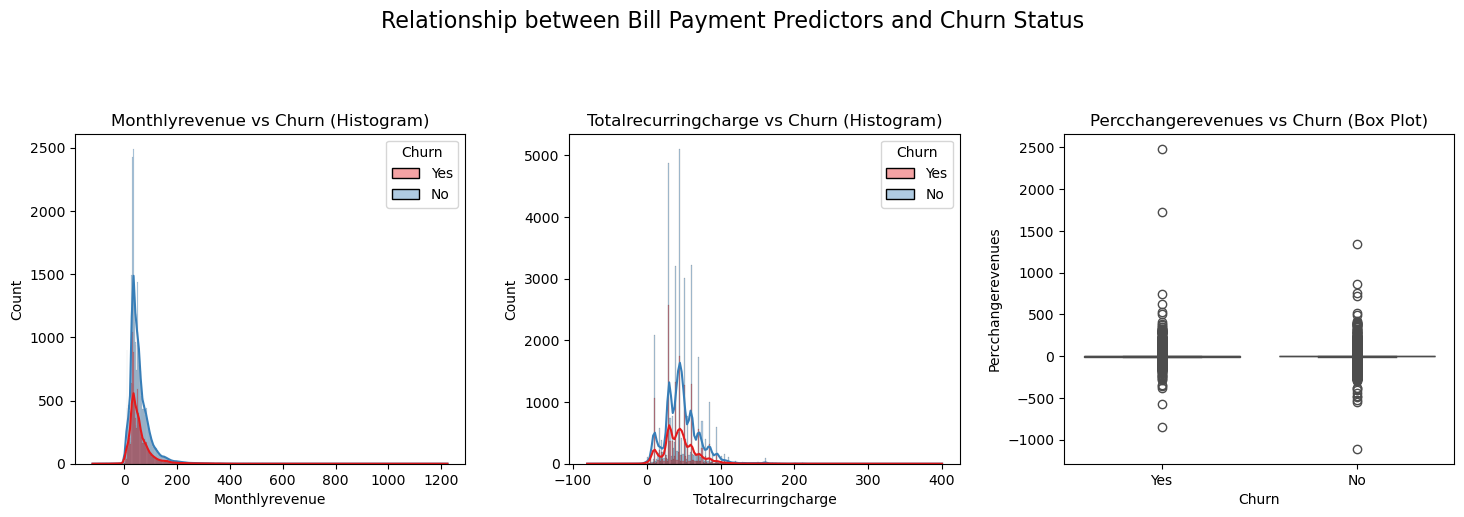

In [30]:
#Bill Payment Category plot
# Define the predictors and plot settings
predictors = [
    ('MonthlyRevenue', 'histplot', {'kde': True, 'alpha': 0.4}),
    ('TotalRecurringCharge', 'histplot', {'kde': True, 'alpha': 0.4}),
    ('PercChangeRevenues', 'boxplot', {})  # Add an empty dictionary for plot_kwargs
]

sns.set_palette("Set1")

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))  
fig.suptitle("Relationship between Bill Payment Predictors and Churn Status", fontsize=16, y=1.05)
axes = axes.ravel()

# Plot each predictor based on the specified plot type
for i, (predictor, plot_type, plot_kwargs) in enumerate(predictors):
    if plot_type == 'histplot':
        sns.histplot(data=xtrain_pymt, x=predictor, hue='Churn', ax=axes[i], **plot_kwargs)
        axes[i].set_title(f'{predictor.replace("_", " ").title()} vs Churn (Histogram)')
        axes[i].set_xlabel(predictor.replace("_", " ").title())
        axes[i].set_ylabel("Count")
        
    elif plot_type == 'boxplot':
        sns.boxplot(data=xtrain_pymt, x='Churn', y=predictor, ax=axes[i], **plot_kwargs)
        axes[i].set_title(f'{predictor.replace("_", " ").title()} vs Churn (Box Plot)')
        axes[i].set_xlabel("Churn")
        axes[i].set_ylabel(predictor.replace("_", " ").title())
        
    elif plot_type == 'countplot':
        sns.countplot(data=xtrain_pymt, x=predictor, hue='Churn', ax=axes[i], **plot_kwargs)
        axes[i].set_title(f'{predictor.replace("_", " ").title()} (Count Plot)')
        axes[i].set_xlabel(predictor.replace("_", " ").title())
        axes[i].set_ylabel("Count")


plt.tight_layout(pad=2)
plt.show()

### Customer Care Predictors and Churn Status


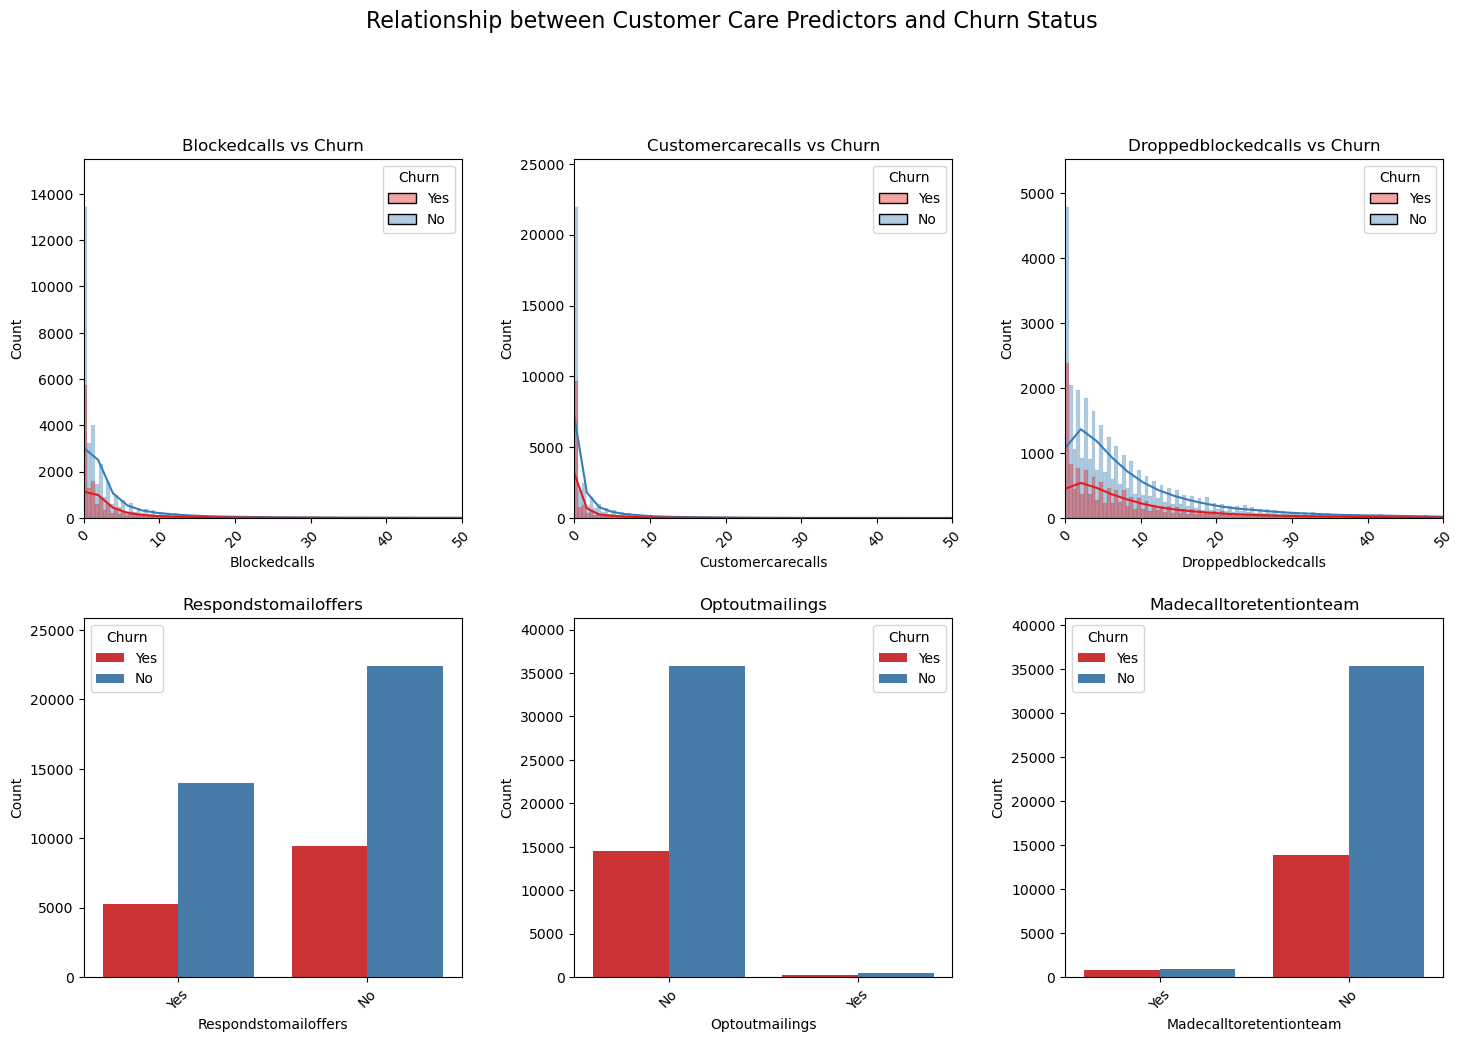

In [ ]:
#Customercare Category plot
#"Customercare": ["BlockedCalls", "CustomerCareCalls", "DroppedBlockedCalls", "RespondsToMailOffers", "OptOutMailings", "MadeCallToRetentionTeam"],


predictors = [
    ('BlockedCalls', 'histplot', {'kde': True, 'alpha': 0.4, 'binwidth': 0.5}),
    ('CustomerCareCalls', 'histplot', {'kde': True, 'alpha': 0.4, 'binwidth': 0.5}),
    ('DroppedBlockedCalls', 'histplot', {'kde': True, 'alpha': 0.4, 'binwidth': 0.5}),
    ('RespondsToMailOffers', 'countplot', {}),
    ('OptOutMailings', 'countplot', {}),
    ('MadeCallToRetentionTeam', 'countplot', {}),
]


sns.set_palette("Set1")


fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))  
fig.suptitle("Relationship between Customer Care Predictors and Churn Status", fontsize=16, y=1.05)
axes = axes.ravel()


for i, (predictor, plot_type, plot_kwargs) in enumerate(predictors):
    if plot_type == 'histplot':
        plot = sns.histplot(data=xtrain_care, x=predictor, hue='Churn', ax=axes[i], **plot_kwargs)
        axes[i].set_title(f'{predictor.replace("_", " ").title()} vs Churn')
        axes[i].set_xlabel(predictor.replace("_", " ").title())
        axes[i].set_ylabel("Count")
        axes[i].set_xlim(0, 50)
        

        max_y = plot.get_ylim()[1]
        axes[i].set_ylim(0, max_y * 1.1) 

    elif plot_type == 'countplot':
        plot = sns.countplot(data=xtrain_care, x=predictor, hue='Churn', ax=axes[i], **plot_kwargs)
        axes[i].set_title(f'{predictor.replace("_", " ").title()}')
        axes[i].set_xlabel(predictor.replace("_", " ").title())
        axes[i].set_ylabel("Count")
        
        
        max_y = plot.get_ylim()[1]
        axes[i].set_ylim(0, max_y * 1.1)  # Add some padding to the top

    axes[i].tick_params(axis='x', rotation=45)


plt.tight_layout(pad=2)
plt.show()



### Customer Demographics Predictors and Churn Status

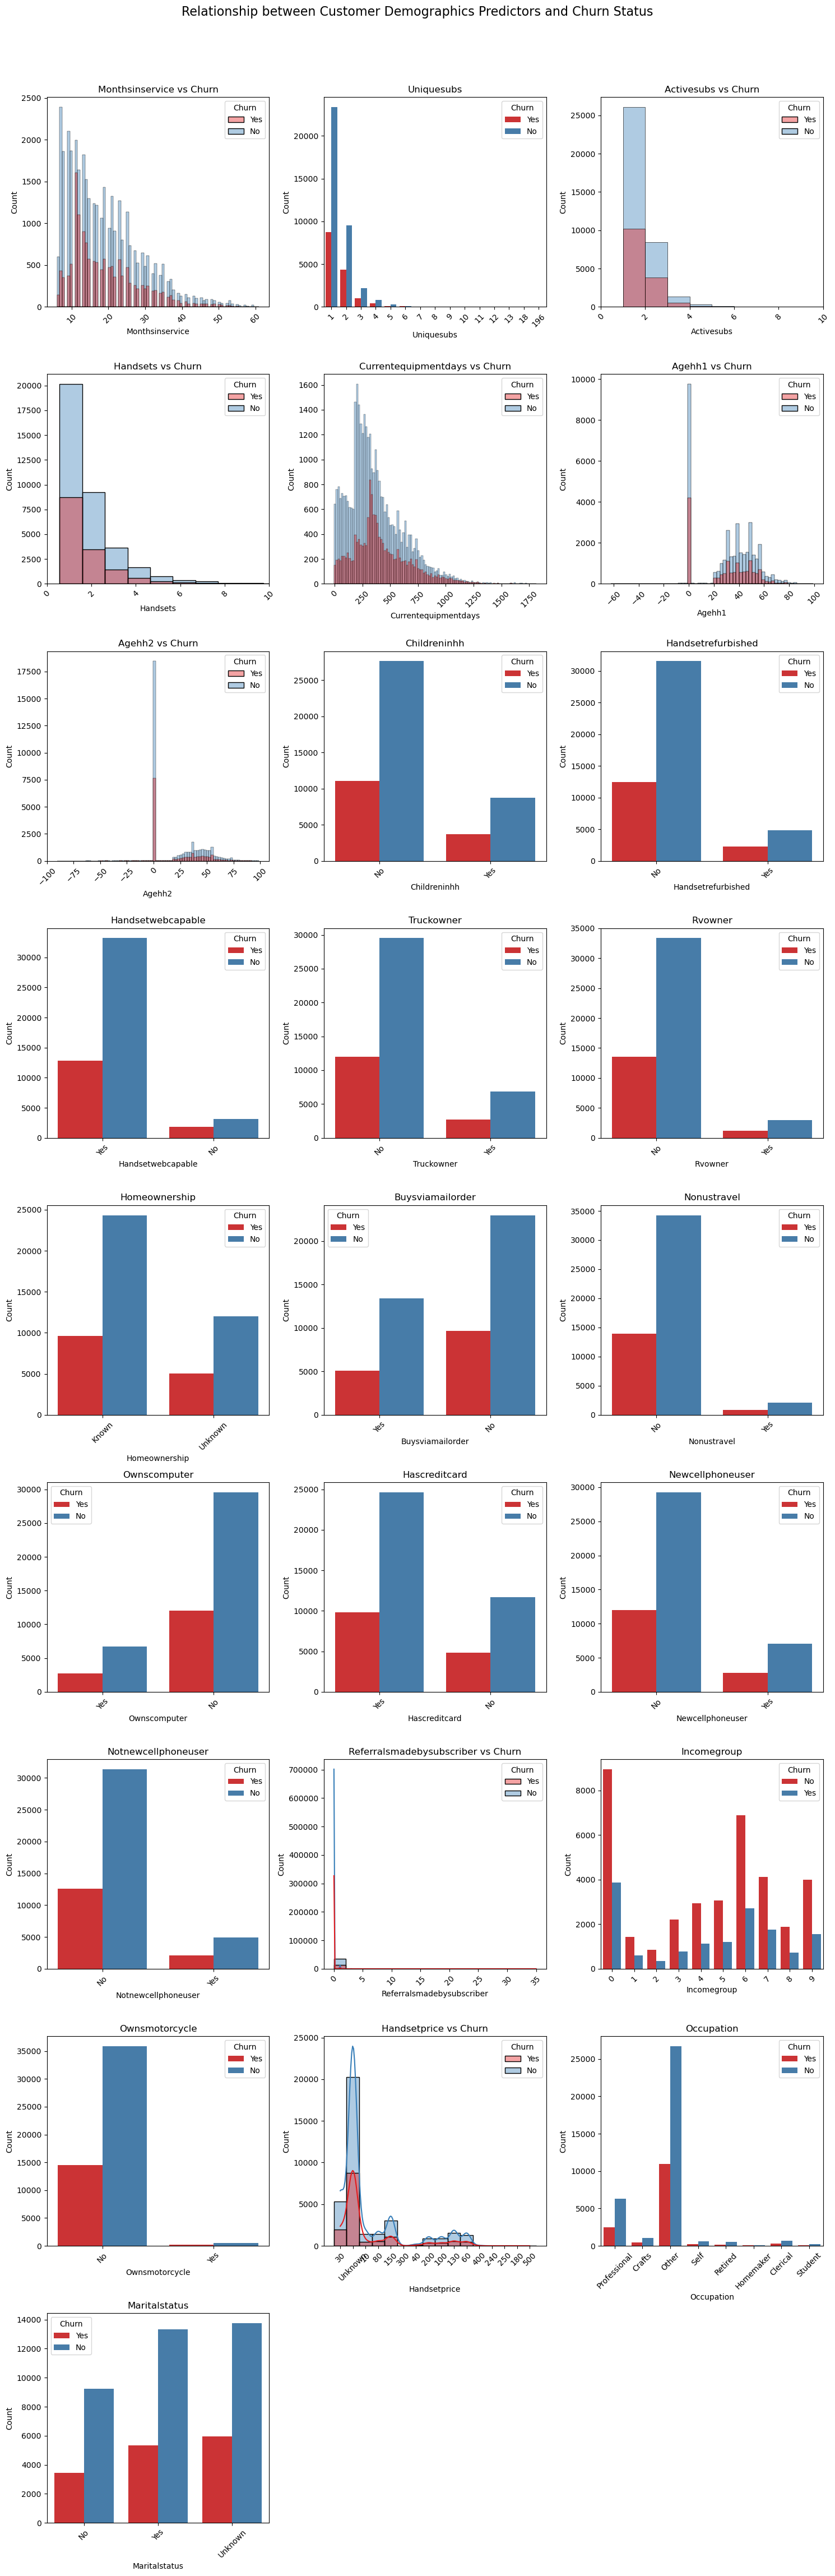

In [32]:
#"Cust_demographic": ["MonthsInService", "UniqueSubs", "ActiveSubs", "ServiceArea", "Handsets", "HandsetModels", "CurrentEquipmentDays", "AgeHH1", "AgeHH2", "ChildrenInHH", "HandsetRefurbished", 
# "HandsetWebCapable", "TruckOwner", "RVOwner", "Homeownership", "BuysViaMailOrder", "NonUSTravel", "OwnsComputer", "HasCreditCard", "NewCellphoneUser", "NotNewCellphoneUser", 
# "ReferralsMadeBySubscriber", "IncomeGroup", "OwnsMotorcycle", "HandsetPrice", "PrizmCode", "Occupation", "MaritalStatus"],
#Customercare Category plot


predictors = [
    ('MonthsInService', 'histplot', {'kde': False, 'alpha': 0.4}),
    ('UniqueSubs', 'countplot', {}),
    ('ActiveSubs', 'histplot', {'kde': False, 'alpha': 0.4,'binwidth' : 1}),
    ('Handsets', 'histplot', {'kde': False, 'alpha': 0.4,'binwidth' : 1}),
    ('CurrentEquipmentDays', 'histplot', {'kde': False, 'alpha': 0.4}),
    ('AgeHH1', 'histplot', {'kde': False, 'alpha': 0.4}),
    ('AgeHH2', 'histplot', {'kde': False, 'alpha': 0.4}),
    ('ChildrenInHH', 'countplot', {}),
    ('HandsetRefurbished', 'countplot', {}),
    ('HandsetWebCapable', 'countplot', {}),
    ('TruckOwner', 'countplot', {}),
    ('RVOwner', 'countplot', {}),
    ('Homeownership', 'countplot', {}),
    ('BuysViaMailOrder', 'countplot', {}),
    ('NonUSTravel', 'countplot', {}),
    ('OwnsComputer', 'countplot', {}),
    ('HasCreditCard', 'countplot', {}),
    ('NewCellphoneUser', 'countplot', {}),
    ('NotNewCellphoneUser', 'countplot', {}),
    ('ReferralsMadeBySubscriber', 'histplot', {'kde': True, 'alpha': 0.4}),
    ('IncomeGroup', 'countplot', {}),
    ('OwnsMotorcycle', 'countplot', {}),
    ('HandsetPrice', 'histplot', {'kde': True, 'alpha': 0.4}),
    ('Occupation', 'countplot', {}),
    ('MaritalStatus', 'countplot', {})
]


sns.set_palette("Set1")


available_predictors = [(predictor, plot_type, plot_kwargs) for predictor, plot_type, plot_kwargs in predictors if not xtrain_customer_demo[predictor].dropna().empty]


n_plots = len(available_predictors)
ncols = 3
nrows = (n_plots + ncols - 1) // ncols  


fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 5 * nrows))  
fig.suptitle("Relationship between Customer Demographics Predictors and Churn Status", fontsize=16, y=1.02)
axes = axes.ravel()


for i, (predictor, plot_type, plot_kwargs) in enumerate(available_predictors):
    if plot_type == 'histplot':
        sns.histplot(data=xtrain_customer_demo, x=predictor, hue='Churn', ax=axes[i], **plot_kwargs)
        axes[i].set_title(f'{predictor.replace("_", " ").title()} vs Churn')
        axes[i].set_xlabel(predictor.replace("_", " ").title())
        axes[i].set_ylabel("Count")
           
        if predictor == 'Handsets':
            axes[i].set_xlim(0, 10) 
        elif predictor == 'ActiveSubs':
            axes[i].set_xlim(0, 10)  
        
    elif plot_type == 'countplot':
        sns.countplot(data=xtrain_customer_demo, x=predictor, hue='Churn', ax=axes[i])
        axes[i].set_title(f'{predictor.replace("_", " ").title()}')
        axes[i].set_xlabel(predictor.replace("_", " ").title())
        axes[i].set_ylabel("Count")
    
    axes[i].tick_params(axis='x', rotation=45)


for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout() 
plt.show()

### Credit Score Predictors and Churn Status

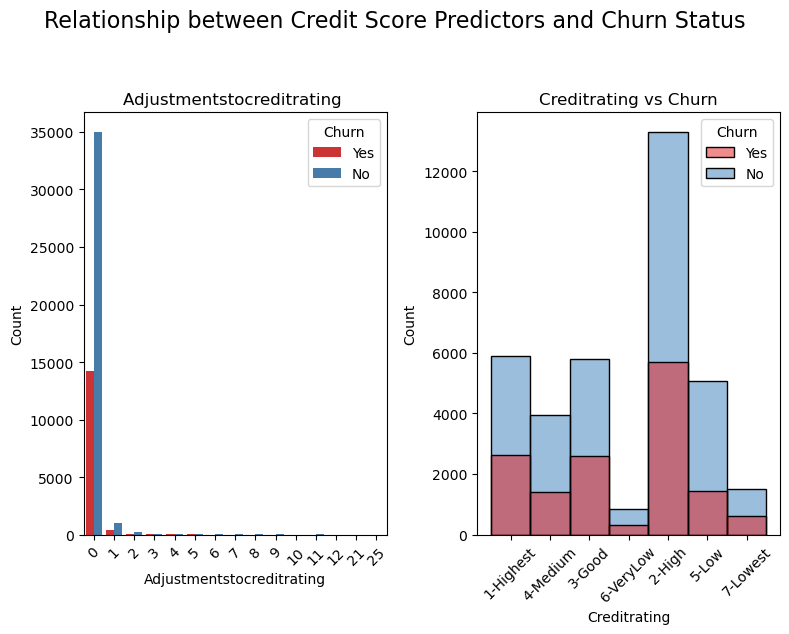

In [33]:
# "Creditscore": ["AdjustmentsToCreditRating", "CreditRating"]
#Credit score Category plot

predictors = [
    ('AdjustmentsToCreditRating', 'countplot', {}),
    ('CreditRating', 'histplot', {}),
]

sns.set_palette("Set1")

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 6))  
fig.suptitle("Relationship between Credit Score Predictors and Churn Status", fontsize=16, y=1.05)
axes = axes.ravel()


for i, (predictor, plot_type, plot_kwargs) in enumerate(predictors):
    if plot_type == 'histplot':
        sns.histplot(data=xtrain_credit, x=predictor, hue='Churn', ax=axes[i], **plot_kwargs)
        axes[i].set_title(f'{predictor.replace("_", " ").title()} vs Churn')
        axes[i].set_xlabel(predictor.replace("_", " ").title())
        axes[i].set_ylabel("Count")
        
    elif plot_type == 'boxplot':
        sns.boxplot(data=xtrain_credit, x='Churn', y=predictor, ax=axes[i], **plot_kwargs)
        axes[i].set_title(f'{predictor.replace("_", " ").title()} vs Churn')
        axes[i].set_xlabel("Churn")
        axes[i].set_ylabel(predictor.replace("_", " ").title())
        
    elif plot_type == 'countplot':
        sns.countplot(data=xtrain_credit, x=predictor, hue='Churn', ax=axes[i], **plot_kwargs)
        axes[i].set_title(f'{predictor.replace("_", " ").title()} ')
        axes[i].set_xlabel(predictor.replace("_", " ").title())
        axes[i].set_ylabel("Count")
        
    axes[i].tick_params(axis='x', rotation=45)
    # Set y-axis limit if specified in y_limits dictionary
    if predictor in y_limits and y_limits[predictor] is not None:
        axes[i].set_ylim(y_limits[predictor])


plt.tight_layout()
plt.show()

### Customer usage Predictors and Churn Status

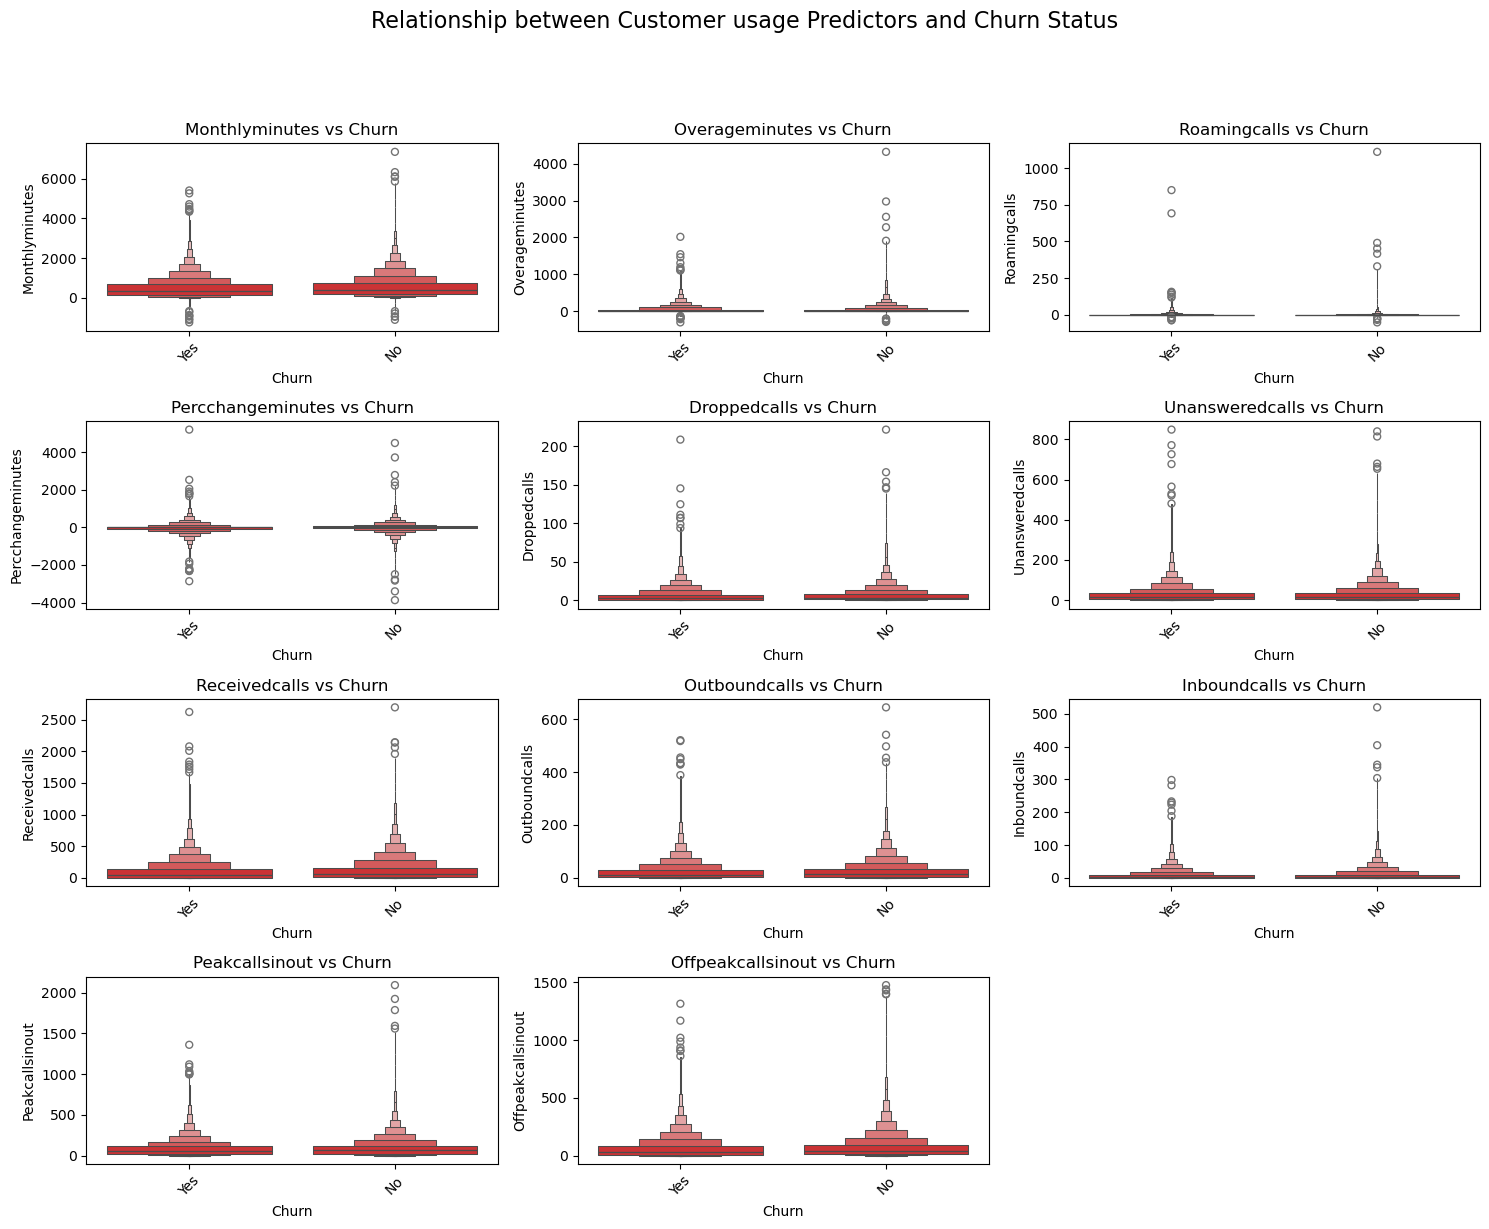

In [34]:
#Customer usage
#"Customer_usage": ["MonthlyMinutes", "OverageMinutes", "RoamingCalls", "PercChangeMinutes", "DroppedCalls", "UnansweredCalls", 
# "ReceivedCalls", "OutboundCalls", "InboundCalls", "PeakCallsInOut", "OffPeakCallsInOut"],


predictors = [
    ('MonthlyMinutes', 'boxenplot', {}),
    ('OverageMinutes', 'boxenplot', {}),
    ('RoamingCalls', 'boxenplot', {}),
    ('PercChangeMinutes', 'boxenplot', {}),
    ('DroppedCalls', 'boxenplot', {}),
    ('UnansweredCalls', 'boxenplot', {}),
    ('ReceivedCalls', 'boxenplot', {}),
    ('OutboundCalls', 'boxenplot', {}),
    ('InboundCalls', 'boxenplot', {}),
    ('PeakCallsInOut', 'boxenplot', {}),
    ('OffPeakCallsInOut', 'boxenplot', {})
]


sns.set_palette("Set1")


fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 12))  # Adjusted figsize for better visibility
fig.suptitle("Relationship between Customer usage Predictors and Churn Status", fontsize=16, y=1.02)
axes = axes.ravel()


for i, (predictor, plot_type, plot_kwargs) in enumerate(predictors):
    # Check if the predictor column contains data
    if not xtrain_customer_usage[predictor].dropna().empty:  # Proceed if there is data
        if plot_type == 'boxenplot':
            sns.boxenplot(data=xtrain_customer_usage, x='Churn', y=predictor, ax=axes[i], **plot_kwargs)
            axes[i].set_title(f'{predictor.replace("_", " ").title()} vs Churn')
            axes[i].set_xlabel("Churn")
            axes[i].set_ylabel(predictor.replace("_", " ").title())
    else:
        # If no data, turn off the axis to hide it
        axes[i].axis('off')
        
    axes[i].tick_params(axis='x', rotation=45)


for j in range(i + 1, len(axes)):
    axes[j].axis('off')


plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

### Value Add Predictors and Churn Status

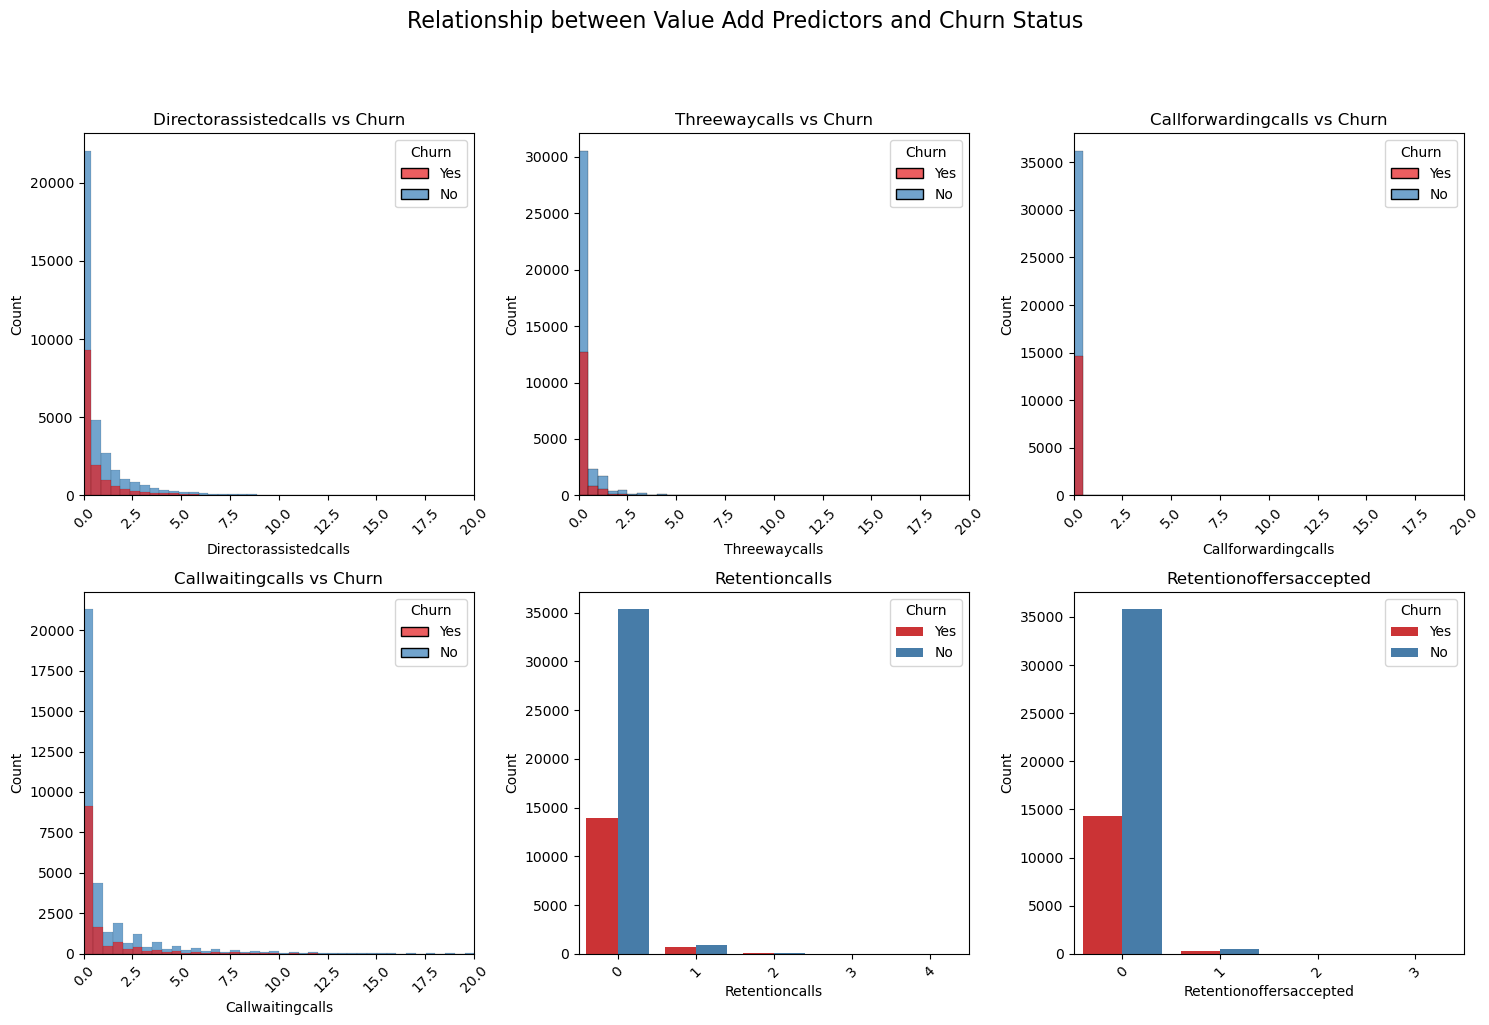

In [35]:

# Define the predictors and plot settings
predictors = [
    ('DirectorAssistedCalls', 'histplot', {'kde': False, 'alpha': 0.7, 'binwidth': 0.5}),
    ('ThreewayCalls', 'histplot', {'kde': False, 'alpha': 0.7, 'binwidth': 0.5}),
    ('CallForwardingCalls', 'histplot', {'kde': False, 'alpha': 0.7, 'binwidth': 0.5}),
    ('CallWaitingCalls', 'histplot', {'kde': False, 'alpha': 0.7, 'binwidth': 0.5}),
    ('RetentionCalls', 'countplot', {}),
    ('RetentionOffersAccepted', 'countplot', {}),
]


sns.set_palette("Set1")


fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))  
fig.suptitle("Relationship between Value Add Predictors and Churn Status", fontsize=16, y=1.02)
axes = axes.ravel()


x_limits = {
    'DirectorAssistedCalls': (0, 20),       
    'ThreewayCalls': (0, 20),
    'CallForwardingCalls': (0, 20),
    'CallWaitingCalls': (0, 20),
}


for i, (predictor, plot_type, plot_kwargs) in enumerate(predictors):
    if not xtrain_valueadd[predictor].dropna().empty:
        if plot_type == 'histplot':
            sns.histplot(data=xtrain_valueadd, x=predictor, hue='Churn', ax=axes[i], **plot_kwargs)
            axes[i].set_title(f'{predictor.replace("_", " ").title()} vs Churn')
            axes[i].set_xlabel(predictor.replace("_", " ").title())
            axes[i].set_ylabel("Count")

            
            if predictor in x_limits:
                axes[i].set_xlim(x_limits[predictor])

        elif plot_type == 'countplot':
            sns.countplot(data=xtrain_valueadd, x=predictor, hue='Churn', ax=axes[i])
            axes[i].set_title(f'{predictor.replace("_", " ").title()}')
            axes[i].set_xlabel(predictor.replace("_", " ").title())
            axes[i].set_ylabel("Count")
            
    else:
        axes[i].axis('off')
        
    axes[i].tick_params(axis='x', rotation=45)


for j in range(i + 1, len(axes)):
    axes[j].axis('off')


plt.tight_layout(rect=[0, 0, 1, 0.97]) 
plt.show()

## Visualizations

In [23]:
train.columns

Index(['CustomerID', 'MonthlyRevenue', 'MonthlyMinutes',
       'TotalRecurringCharge', 'DirectorAssistedCalls', 'OverageMinutes',
       'RoamingCalls', 'PercChangeMinutes', 'PercChangeRevenues',
       'DroppedCalls', 'BlockedCalls', 'UnansweredCalls', 'CustomerCareCalls',
       'ThreewayCalls', 'ReceivedCalls', 'OutboundCalls', 'InboundCalls',
       'PeakCallsInOut', 'OffPeakCallsInOut', 'DroppedBlockedCalls',
       'CallForwardingCalls', 'CallWaitingCalls', 'MonthsInService',
       'UniqueSubs', 'ActiveSubs', 'Handsets', 'HandsetModels',
       'CurrentEquipmentDays', 'AgeHH1', 'AgeHH2', 'RetentionCalls',
       'RetentionOffersAccepted', 'ReferralsMadeBySubscriber', 'IncomeGroup',
       'AdjustmentsToCreditRating', 'Churn', 'ServiceArea', 'ChildrenInHH',
       'HandsetRefurbished', 'HandsetWebCapable', 'TruckOwner', 'RVOwner',
       'Homeownership', 'BuysViaMailOrder', 'RespondsToMailOffers',
       'OptOutMailings', 'NonUSTravel', 'OwnsComputer', 'HasCreditCard',
       'N

In [ ]:
demographic_columns = {
    "PrizmCode": "Urban vs Rural", #demographic
    "Occupation": "Occupation", #demographic
    "MaritalStatus": "Marital Status", #demographic
    "Homeownership": "Homeownership", #demographic
}

financial_columns = {
    "CreditRating": "Credit Rating", #financial
    "IncomeGroup": "Income Group", #financial
}

In [ ]:
colors_of_seoul = [
    "#DD516C",
    "#5676A5",
    "#2C5044",
    "#C1641E",
    "#98212B",
    "#563935",
]

### Count Data

#### Financial Covariate Distributions

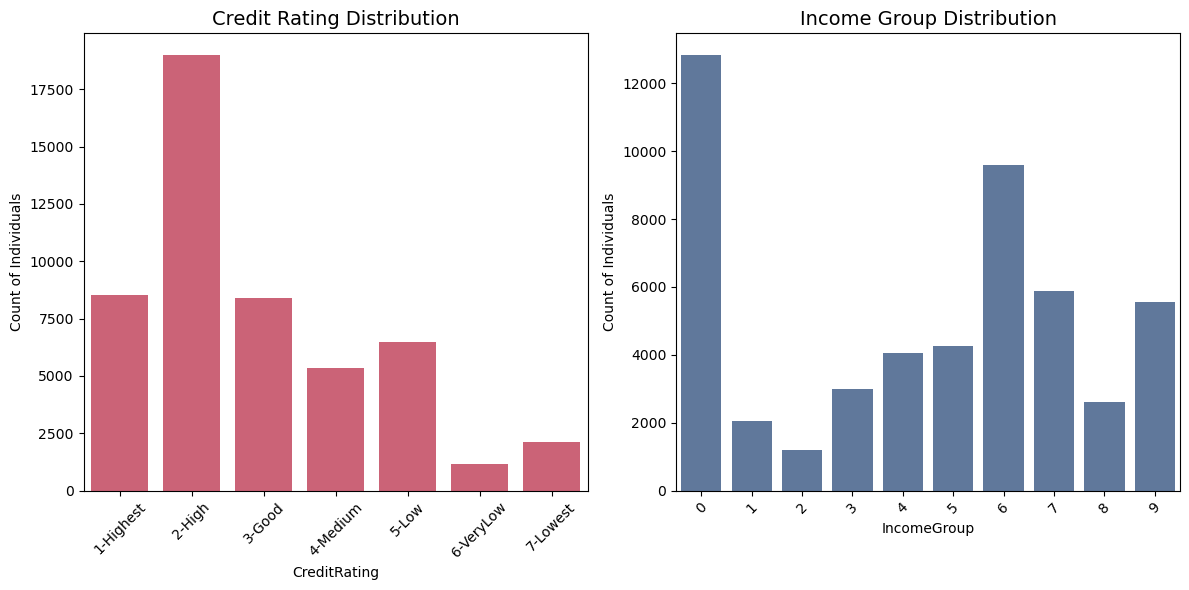

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

for ax, column, color in zip(ax.ravel(), financial_columns.keys(), colors_of_seoul):
    counts = train[column].value_counts().reset_index()
    counts = counts.sort_values(column)

    sns.barplot(x=column, y='count', data=counts, ax=ax, color=color)
    ax.set_title(f'{financial_columns[column]} Distribution', fontsize=14)
    ax.set_ylabel('Count of Individuals')
    ax.set_xlabel(column)
    ax.set_xticks(np.arange(counts.shape[0]))
    ax.set_xticklabels(counts[column], rotation=45)

plt.tight_layout()

#### Demographic Covariates Distribution

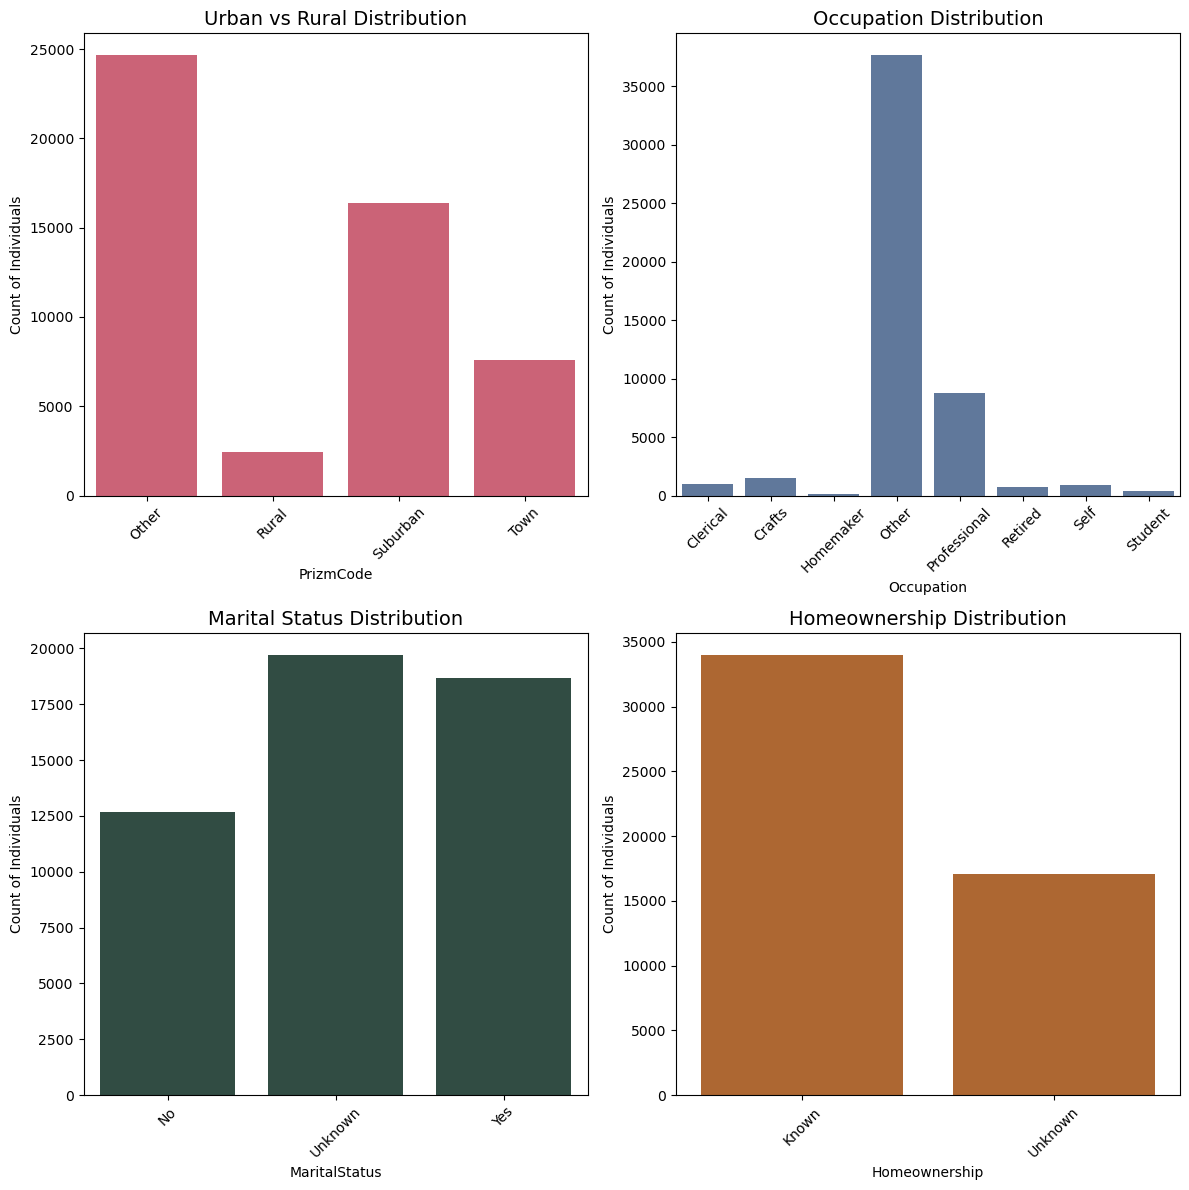

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(12, 12))

for ax, column, color in zip(ax.ravel(), demographic_columns.keys(), colors_of_seoul):
    counts = train[column].value_counts().reset_index()
    counts = counts.sort_values(column)

    sns.barplot(x=column, y='count', data=counts, ax=ax, color=color)
    ax.set_title(f'{demographic_columns[column]} Distribution', fontsize=14)
    ax.set_ylabel('Count of Individuals')
    ax.set_xlabel(column)
    ax.set_xticks(np.arange(counts.shape[0]))
    ax.set_xticklabels(counts[column], rotation=45)

plt.tight_layout()

### Continous Variables Distribution

In [ ]:
continous_features = train.select_dtypes(include=[np.float64]).columns
# Need to choose correct subset of features
continous_features = continous_features[0:6]

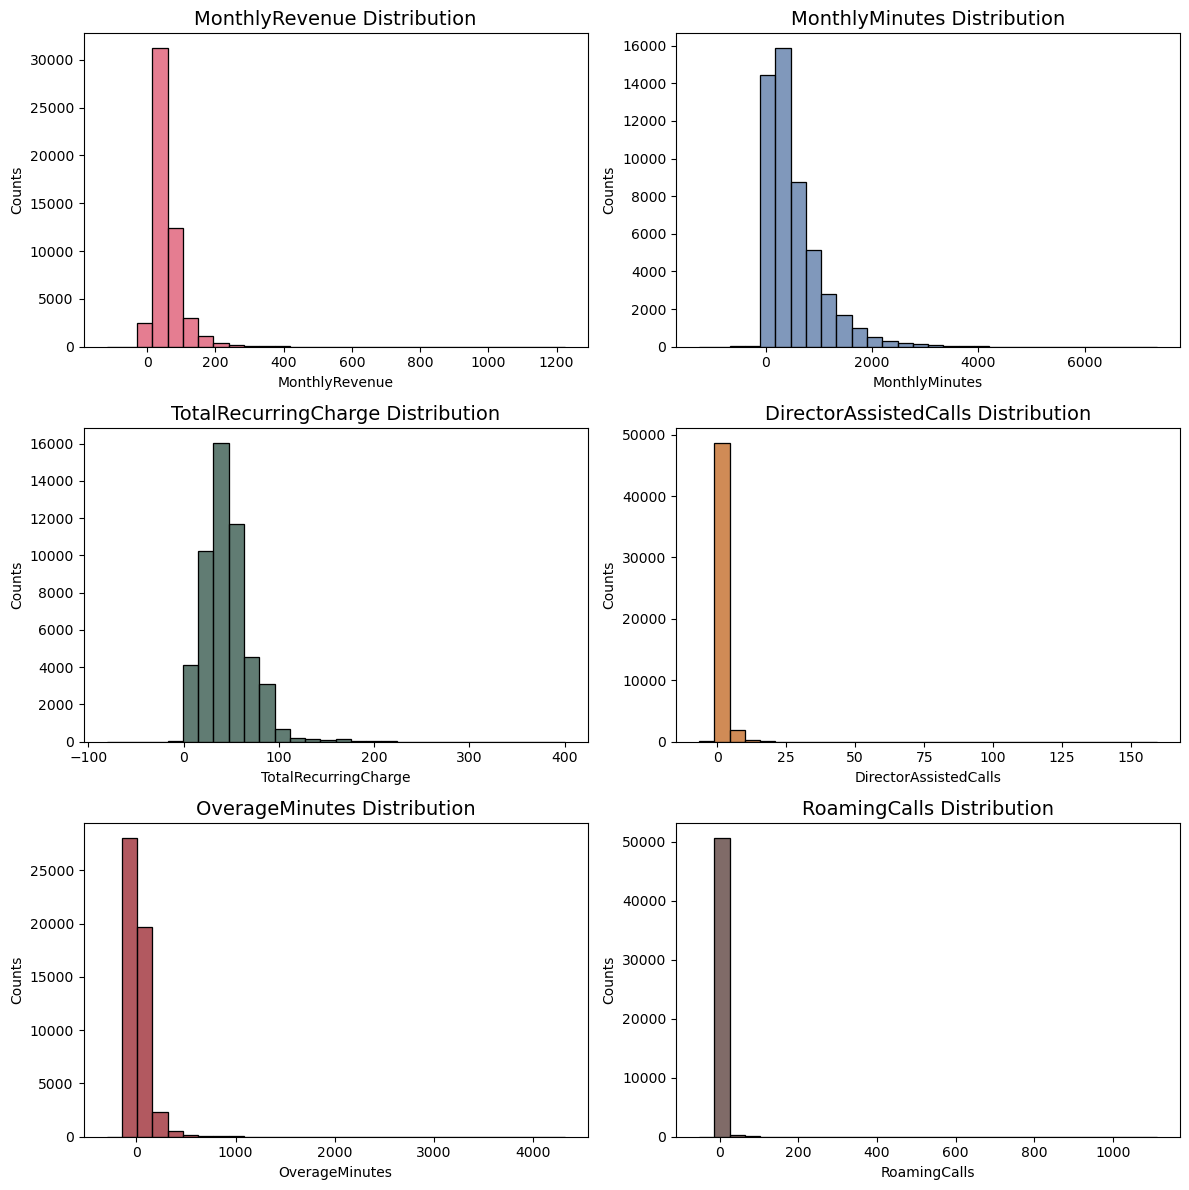

In [ ]:
fig, ax = plt.subplots(3, 2, figsize=(12, 12))

for ax, column, color in zip(ax.ravel(), continous_features, colors_of_seoul):
    sns.histplot(x=column, data=train[[column]], bins=30, ax=ax, color=color)
    ax.set_title(f'{column} Distribution', fontsize=14)
    ax.set_ylabel('Counts')
    ax.set_xlabel(column)

plt.tight_layout()

### Determining Features that Correlate with Churn

In [ ]:
X_train = train.drop(columns=['CustomerID', 'Churn'])
pd.set_option('future.no_silent_downcasting', True)
y_train = train['Churn'].replace({'Yes': 1, 'No': 0})

In [ ]:
continuous_features = [
    "MonthlyRevenue", 
    "TotalRecurringCharge",
    "OverageMinutes",
    "MonthlyMinutes",
    "DroppedCalls",
    "ReceivedCalls",
]

# Total of 6
count_features = list(financial_columns.keys()) + list(demographic_columns.keys())

features = continuous_features + count_features

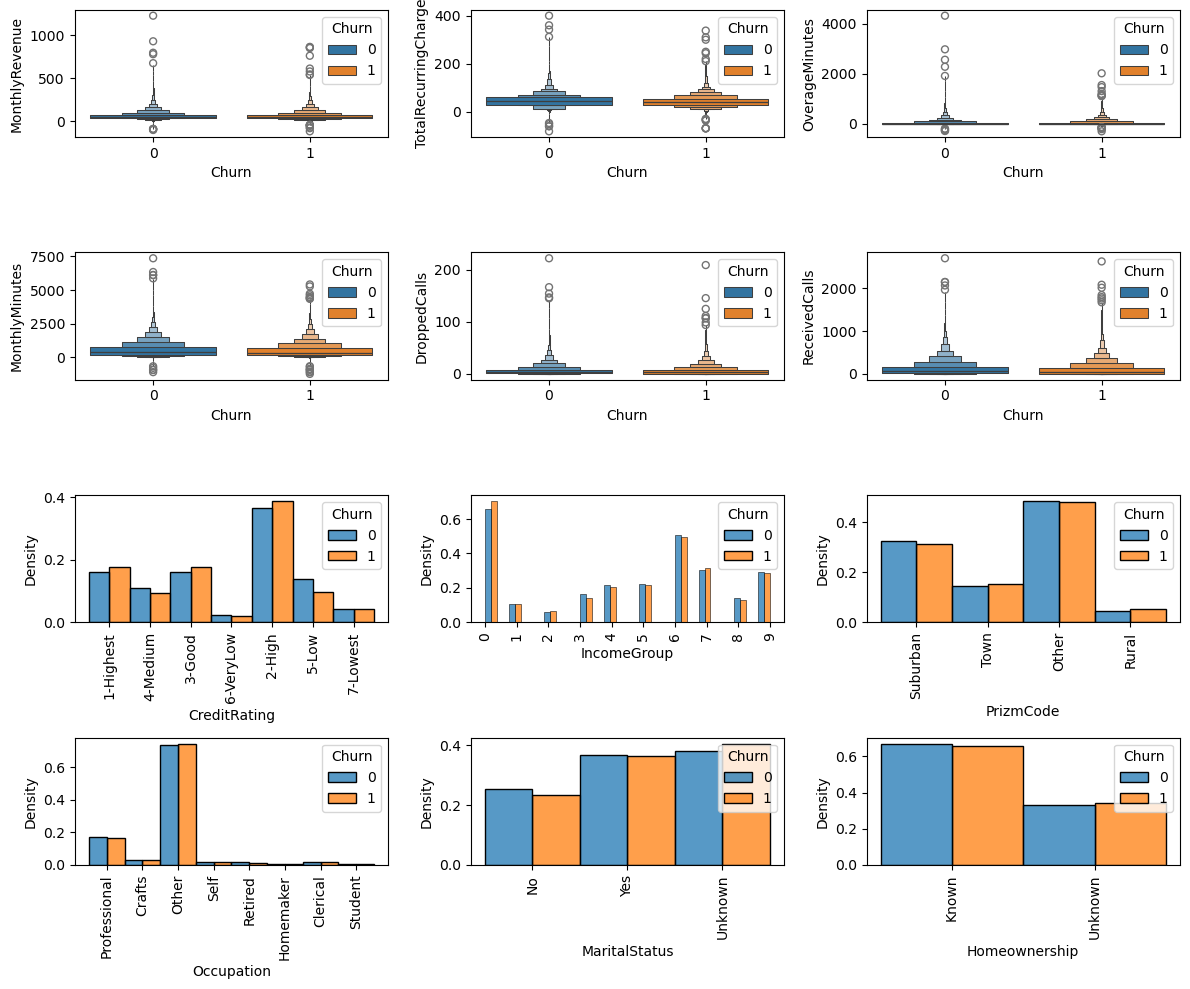

In [ ]:
fig, ax = plt.subplots(4, 3, figsize=(12, 10))  

for ax, feature in zip(ax.ravel(), features):
    if feature in continuous_features:
        _=sns.boxenplot(
            x="Churn", 
            y=feature, 
            data=pd.concat([X_train, y_train], axis=1),
            hue='Churn', 
            ax=ax
        )
        
    elif (feature in count_features):
        _ = sns.histplot(
            x=feature, 
            hue="Churn", 
            multiple="dodge", 
            stat='density', 
            common_norm=False,
            data = pd.concat([X_train, y_train], axis=1),
            ax=ax
        )
        ax.set_xticks(np.arange(X_train[feature].nunique()))
        ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    else:
        pass
    

plt.tight_layout()

TODO after Baseline Model
1. Decision Boundary
2. Feature Importance
3. Sigmoid Curve

## Deeper Understanding of the Data

While basic EDA is important, you should aim to provide a deeper understanding of the data through your analysis. This can be achieved by identifying patterns, trends, class imbalances, and outliers in the data. Additionally, explore the relationships between variables and identify any potential confounding variables that may impact the analysis.

1. Trends: We explored the trend using the only temporal feature "MonthsInService"
   - Initial drop: The churn rate starts around 0.2, drops slightly.
   - Sharp increase: The churn rate increases sharply around the 10 month mark. This could indicate that the users may have some sort of contract that binds them for 10 months.
   - Stablizes: After the spike on the 10th month, churn rate slightly declines and stabilize hovering over 0.2 ~ 0.4 over the next several months.
   - Large fluctuation >50 months: Twards the end, the data shows heavy fluctuation and a spike at the end indicating a potential outlier.
3. Class imbalance: Class imbalance was previously identified and handeled in MS2
4. Outliers:
   - We can identify from the box plot and distribution plots that there are outliers in the dataset. Instead of removing the outliers right now, we'll use different methods such as (1) Cook's distance (if using linear regression) and (2) principal component analysis (PCA) to handle outliers. 
5. Relationship between variables:
   We found strong correlations between features that can lead to multicollinearity. (both shown in the heatmap and pairplots) Later we'll explore methods such as (1) removing one of the correlated features, (2) PCA, (3) feature selection to determine the best method to handle multicollinearity issue.
   - MonthlyRevenue & OverageMinutes: 0.786
   - MonthlyRevenue & MonthlyMinutes: 0.710
   - MonthlyMinutes & ReceivedCalls: 0.828


   However, we didn't find any feature that has direct correlation with Churn. This is interesting as we were expecting at least a weak correlation between some features and churn. It suggests that chrun might depend on more complex interactions between multiple features. 

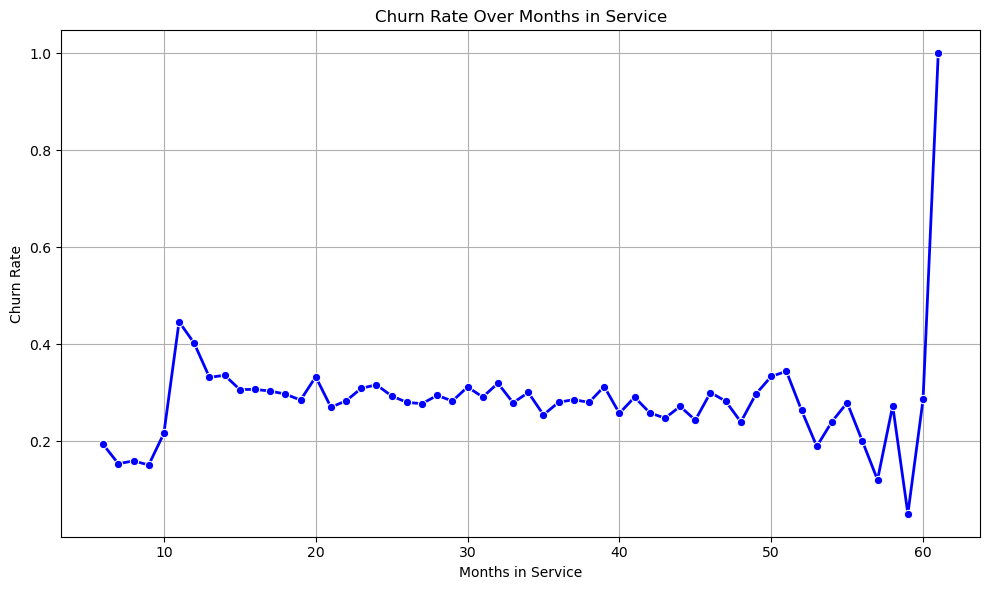

In [ ]:
# Identifying the trend using time trended variable: "MonthsInSerivce"

train['Churn'] = train['Churn'].map({'Yes': 1, 'No': 0})
monthly_churn_rate = train.groupby('MonthsInService')['Churn'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(x='MonthsInService', y='Churn', data=monthly_churn_rate, marker='o', color='b', linestyle='-', linewidth=2, markersize=6)
plt.title('Churn Rate Over Months in Service')
plt.xlabel('Months in Service')
plt.ylabel('Churn Rate')
plt.grid(True)
plt.tight_layout()
plt.show()

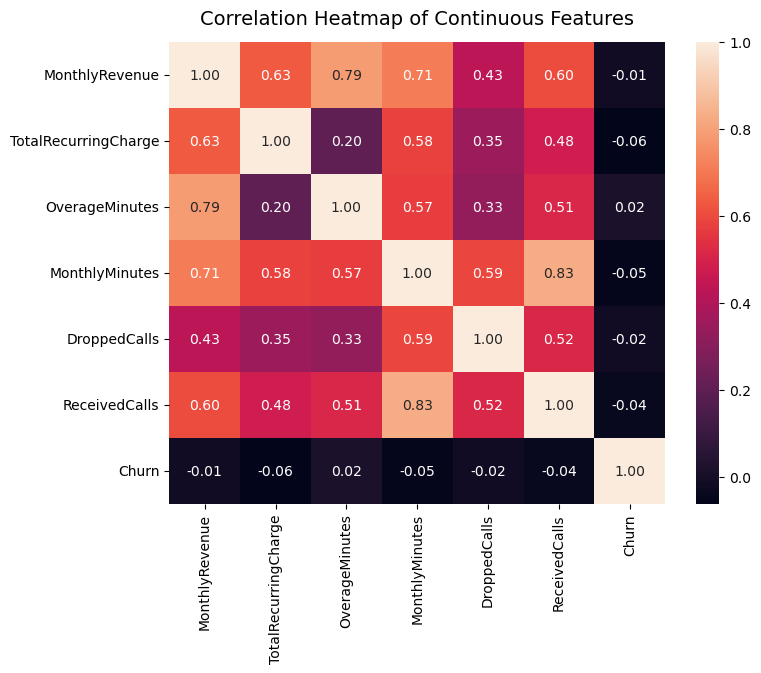

Strong correlations:
                       MonthlyRevenue  TotalRecurringCharge  OverageMinutes  \
MonthlyRevenue              1.000000              0.631675        0.785948   
TotalRecurringCharge        0.631675              1.000000             NaN   
OverageMinutes              0.785948                   NaN        1.000000   
MonthlyMinutes              0.710404                   NaN             NaN   
DroppedCalls                     NaN                   NaN             NaN   
ReceivedCalls               0.603752                   NaN             NaN   
Churn                            NaN                   NaN             NaN   

                      MonthlyMinutes  DroppedCalls  ReceivedCalls  Churn  
MonthlyRevenue              0.710404           NaN       0.603752    NaN  
TotalRecurringCharge             NaN           NaN            NaN    NaN  
OverageMinutes                   NaN           NaN            NaN    NaN  
MonthlyMinutes              1.000000           NaN   

In [ ]:
# Correlation heatmap for continuous variables
correlation_matrix = pd.concat([X_train[continuous_features], y_train], axis=1).corr(method='pearson')
fig, ax = plt.subplots(figsize=(8, 6))  
sns.heatmap(
    correlation_matrix, 
    annot=True,
    fmt=".2f",
    ax=ax
)
ax.set_title('Correlation Heatmap of Continuous Features', fontsize=14, y=1.02)
plt.show();

# Identify strong correlations (greater than 0.6 or less than -0.6)
strong_corr = correlation_matrix[(correlation_matrix > 0.6) | (correlation_matrix < -0.6)]
print("Strong correlations:\n", strong_corr)

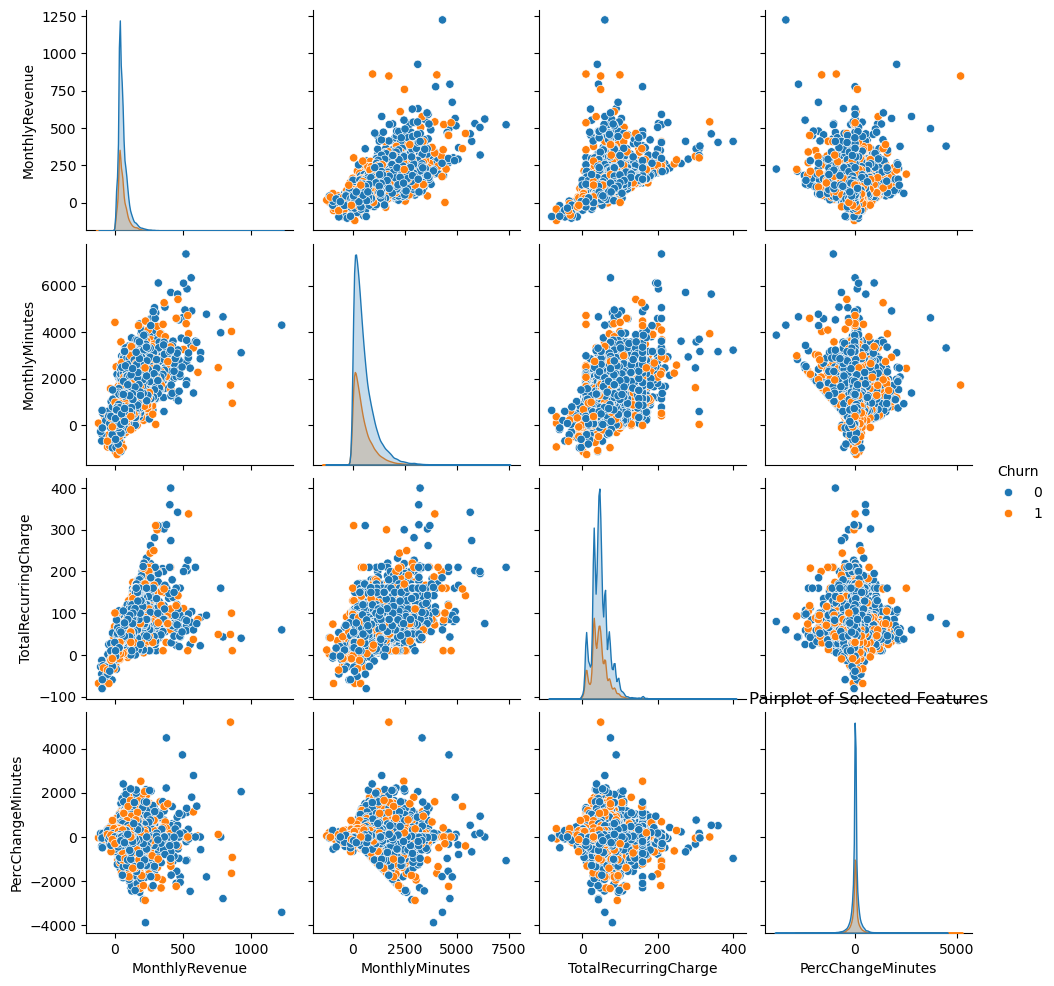

In [ ]:
# Pairplot of selected features (can delete them if it is confusing)
sns.pairplot(train[['MonthlyRevenue', 'MonthlyMinutes', 'TotalRecurringCharge', 'PercChangeMinutes', 'Churn']], hue='Churn')
plt.title('Pairplot of Selected Features')
plt.show()

## Meaningful Insights

The EDA report should provide meaningful insights that can be connected back to the problem at hand. These insights should be well-supported by the data and provide actionable recommendations for addressing the problem. You should focus on providing insights that are relevant to the project question and will add value to the final analysis.

In [ ]:
# I think the "deeper analysis" part actually answered all the meaningful insights section. Let me know if I should be adding more details here! 

## Noteworthy Findings

Summarize the noteworthy findings of their EDA in a clear and concise manner. This can be achieved through the use of visualizations and captions that highlight the most important insights gained through the analysis.

### 1. Service Quality Impact
- Based on the correlation heatmap and pair plot, we don’t see a strong direct correlation between `DroppedCalls` and `Churn`. This suggests that while service quality could impact churn, `DroppedCalls` alone does not show a significant linear relationship with churn.

### 2. Financial Patterns
- **Revenue & Charges**: The correlation heatmap shows a strong relationship between `MonthlyRevenue` and `OverageMinutes` (0.79), as well as `MonthlyRevenue` and `MonthlyMinutes` (0.71). 
- **Churn Correlation**: There is a very weak or negligible correlation between financial variables like `MonthlyRevenue`, `TotalRecurringCharge`, and churn, suggesting that churn is likely influenced by more complex interactions of these variables rather than a single factor.

### 3. Demographic Insights
- **Credit Rating**: Credit rating distribution shows a higher density of churn among customers with a medium (2-High) credit rating.
- **Income Group**: Income Group 6 has the highest representation, while Income Group 0 shows a more varied churn rate.

### 4. Continuous Variables Analysis
- **Monthly Revenue**: The distribution is heavily right-skewed, with most customers having a monthly revenue below.
- **Monthly Minutes**: Similarly right-skewed, showing that most customers have low usage, but a few consume a large number of minutes.
- **Total Recurring Charge**: Right-skewed distribution suggests that most customers have low recurring charges.

### 5. Churn Trends Over Time
- **10-Month Spike**: The churn rate chart shows a significant increase around the 10-month mark, possibly indicating a contract or milestone prompting churn.
- **Long-Term Fluctuations**: After stabilizing around 20-40% for most of the service period, churn rate experiences fluctuations after 50 months, with a sharp peak at the end. 

### 6. Correlation Insights
- **Feature Correlations**: The heatmap shows strong correlations between features like `MonthlyRevenue` & `OverageMinutes` (0.79) and `MonthlyMinutes` & `ReceivedCalls` (0.83), indicating potential multicollinearity, which might need addressing in modeling.
- **No Strong Correlation with Churn**: None of the variables exhibit a strong correlation with churn.


## Finalized Research Question: 

Based on the insights gained through EDA, you should develop a clear project question that will guide your analysis. This question should be well-defined and specific to the problem at hand.

##### few potential research questions based on the insights gained from the EDA I can think of, we can decide together!


1. **"What variables influence churn, and how can these factors be effectively used to predict customer churn?"**

2. **"How do service usage patterns and financial characteristics, such as monthly revenue and overage charges, impact customer churn rates?"**

3. **"What role do demographic factors (such as income, location, and credit rating) play in predicting customer churn?"**

